# Bearbeitung des Checkout-Datensatzes der Seattle Public Library in einem Jupyter Notebook

Die Aufgabenstellung sieht vor, die Lösungen zu fünf unterschiedlichen Fragen, die mit den Daten beantwortet werden können, mithilfe von Python zu implementieren. Mindestens drei der Fragestellungen sollten zu einer Grafik führen. Die Verfasserin entscheidet sich für die Checkouts des Jahres 2018.

Das sind die folgenden fünf Fragen:

In [1]:
# Als ersten Schritt müssen die entsprechenden Libraries importiert werden.

import urllib.request
import pandas as pd

In [2]:
# Anschließend werden zwei neue Variablen definiert.

checkouts_url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkouts_file = "checkouts.csv"

In [3]:
# Nun müssen die Daten heruntergeladen werden.

urllib.request.urlretrieve(checkouts_url, checkouts_file)

('checkouts.csv', <http.client.HTTPMessage at 0x1e5a0bede48>)

In [4]:
# Mithilfe von Pandas werden die Daten nun anschaulich dargestellt.

checkouts = pd.read_csv(checkouts_file)

In [5]:
# Jetzt können die Daten angezeigt werden.

checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2018,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Polar bear Juvenile fiction, Bears Juvenile fi...","Scholastic Press,",2009.
9996,Digital,OverDrive,EBOOK,2018,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Fiction, Humor (Fiction), Mystery","Random House, Inc.",2009
9997,Digital,OverDrive,EBOOK,2018,12,2,The India Fan,Victoria Holt,"Fiction, Historical Fiction, Romance, Suspense",Sourcebooks,2013
9998,Physical,Horizon,VIDEODISC,2018,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Rockefeller Center Drama, Television comedy wr...","Universal Studios Home Entertainment,",[2013]


In [6]:
# Da ich nicht alle Spalten für meine Auswertung benötige, lasse ich nun nur die für mich relevanten Spalten anzeigen. So wird es übersichtlicher.

checkouts[["usageclass", "materialtype", "checkoutmonth", "checkouts", "title", "creator", "publisher"]]

,usageclass,materialtype,checkoutmonth,checkouts,title,creator,publisher
0,Physical,BOOK,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","William Morrow,"
1,Physical,BOOK,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983","Dramatists Play Service,"
2,Physical,SOUNDDISC,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Naxos AudioBooks,"
3,Physical,BOOK,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry","DK Pub.,"
4,Physical,BOOK,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","National Geographic,"
...,...,...,...,...,...,...,...
9995,Physical,BOOK,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Scholastic Press,"
9996,Digital,EBOOK,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Random House, Inc."
9997,Digital,EBOOK,12,2,The India Fan,Victoria Holt,Sourcebooks
9998,Physical,VIDEODISC,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Universal Studios Home Entertainment,"


## 1. Frage: Welches Medium wurde 2018 am häufigsten ausgeliehen?

In [7]:
# Dafür frage ich zunächst ab, wie viele Medien überhaupt über 300 mal ausgeliehen wurden, um eine erste Einschätzung zu erlangen. Dies geschieht mithilfe einer Liste und folgendem Befehl:

checkouts["checkouts"] >= 300

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: checkouts, Length: 10000, dtype: bool

In [8]:
# Anschließend möchte ich dies nun in Form einer Tabelle haben. 

checkouts[checkouts["checkouts"] >= 300]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7356,Physical,Horizon,BOOK,2018,12,585,Past tense / Lee Child.,"Child, Lee","Reacher Jack Fictitious character Fiction, Voy...","Delacorte Press,",2018.
8135,Digital,OverDrive,AUDIOBOOK,2018,12,345,Becoming (Unabridged),Michelle Obama,"African American Nonfiction, Biography & Autob...",Books on Tape,2018


In [9]:
# Auch wenn es offensichtlich ist, dass es nur zwei Einträge gibt, möchte ich dies nochmal bestätigt haben.

filtered_checkouts = checkouts[checkouts["checkouts"] >= 300]

In [10]:
# Mithilfe von "shape" bekomme ich nun bestätigt, dass es zwei Einträge gibt, die mehr als 300 mal ausgeliehen wurden.

filtered_checkouts.shape

(2, 11)

In [11]:
# Mit dem Befehl "max" finde ich nun außerdem heraus, dass ein Medium 585 mal ausgeliehen wurde - was die höchste Ausleihzahl eines Mediums darstellt.

checkouts.checkouts.max()

585

In [12]:
# Doch um welches Medium handelt es sich hierbei? Mit dem folgenden Befehl suche ich mir nun den Datensatz in der Spalte Checkouts heraus, der den höchsten Wert hat.

checkouts[checkouts["checkouts"] == checkouts.checkouts.max()]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7356,Physical,Horizon,BOOK,2018,12,585,Past tense / Lee Child.,"Child, Lee","Reacher Jack Fictitious character Fiction, Voy...","Delacorte Press,",2018.


## Ergebnis 1. Frage 

"Past Tense" von Lee Child ist das am häufigsten ausgeliehene Medium der Seattle Public Library 2018.

## 2. Frage: Wie verändert sich das Ausleihverhalten im Laufe eines Jahres?

Hier möchte ich ermitteln, ob das Ausleihverhalten im Laufe des Jahres 2018 konstant war oder von Jahrenzeiten abhängig war. Dafür werde ich eine Grafik erstellen.

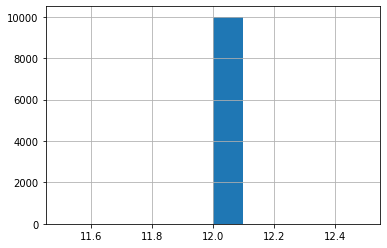

In [13]:
# Hierfür wird ein Histogramm geplottet. Dafür wird die Funktion .hist verwendet.

checkouts["checkoutmonth"].hist()

## Ergebnis 2. Frage

Kurioserweise sind alle Ausleihen in der Checkouts-Liste von 2018 im Dezember verortet.

## 3. Frage: In welchem Verhältnis werden analoge und digitale Medien verliehen?

In der Liste wird dies in der Spalte "usageclass" festgehalten und zwischen "physical" und "digital" unterschieden.

In [14]:
# Um ein Kreisdiagramm erstellen zu können, muss ich zuerst die entsprechende Bibliothek matplotlib importieren.

import matplotlib.pyplot as plt

In [15]:
# Nun muss ich herausfinden, wie die Verteilung von "Physical" und "Digital" genau aussieht. Dazu filtere ich den Datensatz nach "Physical" und "Digital", indem ich die Funktion value_counts()" nutze

checkouts["usageclass"].value_counts()

Physical    6411
Digital     3589
Name: usageclass, dtype: int64

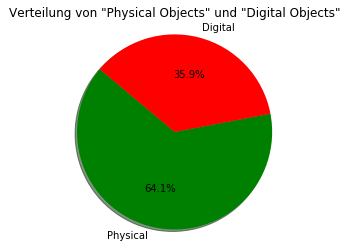

In [16]:
# Dieses Ergebnis möchte ich nun in einem Kreisdiagramm darstellen. Hierfür müssen die einzelnen Parameter wie Label und Farbe definiert werden. Zuvor erstelle ich jedoch eine neue Variable "checkouts_frequency", welche die Werte direkt in das Kreisdiagramm (bei sizes) übertragen.

checkout_frequency = checkouts["usageclass"].value_counts()

labels = ['Physical', 'Digital']
sizes = checkout_frequency
colors = ['green', 'red']

plt.pie(sizes,              
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=140)

plt.title('Verteilung von "Physical Objects" und "Digital Objects"')

plt.axis('equal')

plt.show()

## Ergebnis 3. Frage: 

Wie das Kreisdiagramm veranschaulicht, bestanden 35,9 Prozent der Ausleihen aus digitalen und 64,1 Prozent der Ausleihen aus analogen Objekten.

## 4. Frage: Wie sieht die Verteilung nach "Materialtype" aus?

In der Liste wird dies in der Spalte "materialtype" festgehalten. Dies soll ebenfalls in Form eines Kreisdiagramms dargestellt werden.

In [17]:
checkouts["materialtype"].value_counts()

BOOK                    4563
EBOOK                   2548
AUDIOBOOK               1029
SOUNDDISC                883
VIDEODISC                882
MUSIC                     26
REGPRINT                  18
SOUNDDISC, VIDEODISC      13
ER                         7
VIDEO                      6
CR                         6
MAGAZINE                   6
SOUNDREC                   5
LARGEPRINT                 4
ER, SOUNDDISC              2
MIXED                      2
Name: materialtype, dtype: int64

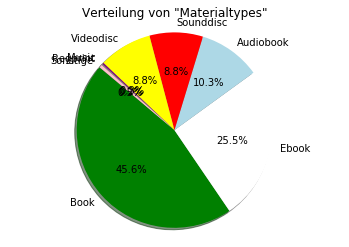

In [18]:
# Es gibt 16 verschiedene Arten von Medien, die in Seattle ausgeliehen werden können. Diesmal wird keine Variable erstellt, da nicht alle oben ermittelten Werte im Kreisdiagramm dargestellt werden sollen. Die letzten neun Werte sollen nämlich als "Sonstiges" im Kreisdiagramm zu finden sein und werden deshalb zusammengerechnet.
# Schlussendlich werden die Parameter für das Kreisdiagramm erstellt.

labels = ['Book', 'Ebook', 'Audiobook', 'Sounddisc', 'Videodisc', 'Music', 'Regprint', 'Sonstige']
sizes = [4563, 2548, 1029, 883, 882, 26, 18, 51]
colors = ['green', 'white', 'lightblue', 'red', 'yellow', 'purple', 'gray', 'pink', 'orange']

plt.pie(sizes,              
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=140)

plt.title('Verteilung von "Materialtypes"')

plt.axis('equal')

plt.show()

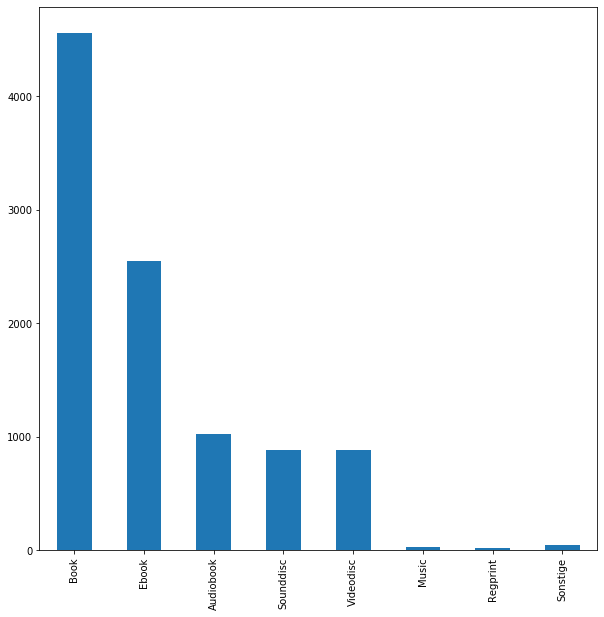

In [19]:
# Zwar sind im obigen Kreisdiagramm die Prozentzahlen zu erkennen, es ist jedoch visuell nicht sehr ansprechend. Aus diesem Grund habe ich mich zusätzlich für ein Säulendiagramm entschieden.

materialtypes = ['Book', 'Ebook', 'Audiobook', 'Sounddisc', 'Videodisc', 'Music', 'Regprint', 'Sonstige']
series = pd.Series([4563, 2548, 1029, 883, 882, 26, 18, 51], 
                   index=materialtypes, 
                   name='materialtypes')
series.plot.bar(figsize=(10, 10))

## Ergebnis 4. Frage:

Ein Großteil der ausgeliehenen Medien sind Bücher, mit etwas Abstand darauf folgen Ebooks. Sehr weit dahinter, aber nah beieinander befinden sich schließlich Audiobooks, Sounddiscs und Videodiscs.

## 5. Frage: Wie hoch ist die Zahl der Gesamtausleihen 2018?

In [20]:
# Hierfür berechne ich die Summe aller Checkouts.

checkouts["checkouts"].sum()

34686

## Ergebnis 5. Frage: 

Insgesamt wurden 34.686 Ausleihen 2018 getätigt.